> # Mestrado Engenharia Informática
>
> ## **Algoritmos para Big Data**

> ### **Felipe Silva** # 121851

> ### **Fernando Piedade** # 109266

> **_*2023/24*_**


# **Data Analysis**


# Initial settings


## Additional packages and imports


In [26]:
import findspark, pyspark

from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

In [27]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [28]:
# Create the Spark session

findspark.init()
findspark.find()

spark = SparkSession\
        .builder\
        .appName("ADBFinacialReportsSecDataAnalysis")\
        .config("spark.sql.shuffle.partitions",200)\
        .config("spark.driver.memory", "16G")\
        .config("spark.sql.repl.eagereval.enabled",True)\
        .getOrCreate()


In [29]:
from IPython.core.display import HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

In [30]:
def plotHorizBar(df, xcol, ycol, colour): 
    return sns.barplot(data=df.toPandas(), x=xcol, y=ycol, color=colour)
def plotLine(df, xcol, ycol):
    return sns.lineplot(data=df, x=xcol, y=ycol)
def plotBar(df, xcol, ycol, huecol=None):
    return sns.barplot(data=df.toPandas(), x=xcol, y=ycol, hue=huecol)

## Collect data from local directory


In [31]:
data_dir = "../Datasets/financial-reports-sec/parquet/large/"

In [32]:
df_test = spark.read.parquet(data_dir + "test.parquet")
df_train = spark.read.parquet(data_dir + "train.parquet")

In [33]:
df_test = df_test.withColumn("report_length", F.length(F.col("report")))
df_train = df_train.withColumn("report_length", F.length(F.col("report")))

df_test = df_test.withColumn("report_word_count", F.size(F.split(F.col('report'), ' ')))
df_train = df_train.withColumn("report_word_count", F.size(F.split(F.col('report'), ' ')))

## Checking Data Collect Results


In [34]:
print("Test Size: " + str(df_test.count()))
print("Train Size: " + str(df_train.count()))


Test Size: 5690
Train Size: 22007


In [35]:
df_test.printSchema()

root
 |-- name: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- report: string (nullable = true)
 |-- report_length: integer (nullable = true)
 |-- report_word_count: integer (nullable = false)



In [36]:
df_plot_test = df_test.groupBy("label").count().orderBy(F.col("label").asc())
df_plot_train = df_train.groupBy("label").count().orderBy(F.col("label").asc())

df_plot_test.show()
df_plot_train.show()

+-----+-----+
|label|count|
+-----+-----+
|    0| 1709|
|    1|  360|
|    2|  267|
|    3|  518|
|    4|  780|
|    5|  253|
|    6|  439|
|    7| 1364|
+-----+-----+

+-----+-----+
|label|count|
+-----+-----+
|    0| 6448|
|    1| 1395|
|    2|  951|
|    3| 2084|
|    4| 2956|
|    5|  996|
|    6| 1723|
|    7| 5454|
+-----+-----+



# Visualization


## Using BarPlot graphic to show Count by different Label


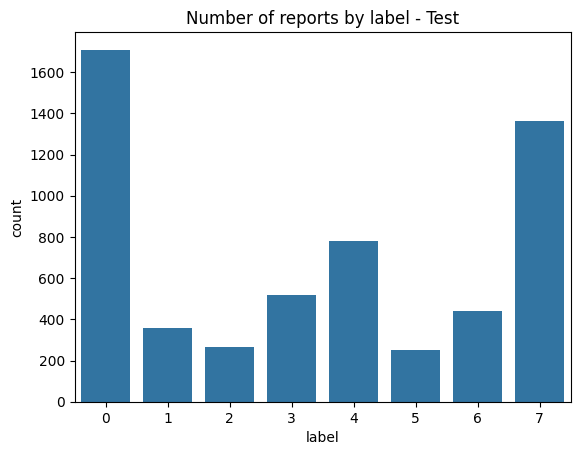

In [37]:
plotBar(df_plot_test, "label", "count")
plt.title('Number of reports by label - Test')
plt.show()


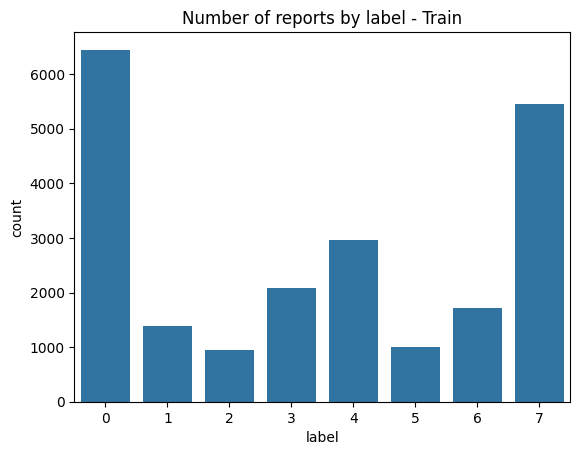

In [38]:
plotBar(df_plot_train, "label", "count")
plt.title('Number of reports by label - Train')
plt.show()


In [44]:
df_plot_test = df_test.groupBy("name").count().orderBy(F.col("count").desc())
df_plot_train = df_train.groupBy("name").count().orderBy(F.col("count").desc())

df_plot_test.show()
df_plot_train.show()

+--------------------+-----+
|                name|count|
+--------------------+-----+
|         ABIOMED INC|    9|
|HELIX ENERGY SOLU...|    8|
|SUPERIOR GROUP OF...|    8|
| TTEC Holdings, Inc.|    8|
|SECURITY NATIONAL...|    8|
|PROGRESSIVE CORP/OH/|    8|
|STANDARD MOTOR PR...|    7|
|              HP INC|    7|
|   ENTERGY CORP /DE/|    7|
|         ALICO, INC.|    7|
|          NIKE, Inc.|    6|
|      FORMFACTOR INC|    6|
|         BELDEN INC.|    6|
|     BCB BANCORP INC|    6|
|        TELEFLEX INC|    6|
|         Yellow Corp|    6|
| EMERSON ELECTRIC CO|    6|
|     VISTA GOLD CORP|    6|
|BASSETT FURNITURE...|    6|
|QUAINT OAK BANCOR...|    6|
+--------------------+-----+
only showing top 20 rows

+--------------------+-----+
|                name|count|
+--------------------+-----+
|     E.W. SCRIPPS Co|   19|
|   EVERSOURCE ENERGY|   18|
|          INTEL CORP|   18|
|VISHAY INTERTECHN...|   18|
|LINCOLN NATIONAL ...|   18|
|   OLYMPIC STEEL INC|   17|
|          CABOT 

## Using BarPlot graphic to show Count by different Company Name


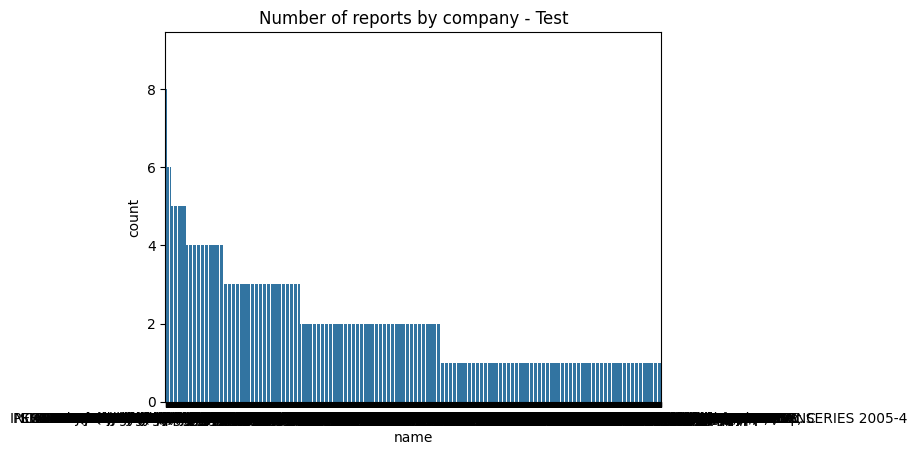

In [45]:
plotBar(df_plot_test, "name", "count")
plt.title('Number of reports by company - Test')
plt.show()


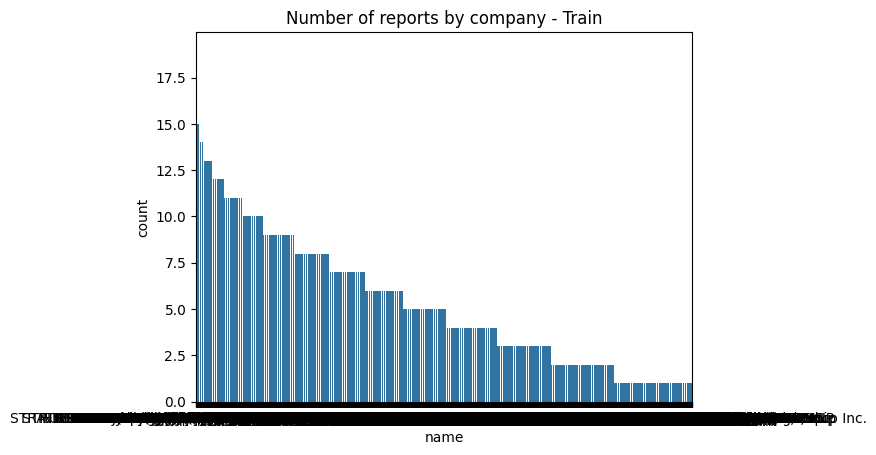

In [46]:
plotBar(df_plot_train, "name", "count")
plt.title('Number of reports by company - Train')
plt.show()

In [47]:
df_plot_test = df_test.select(["label", "report_length"]).orderBy(F.col("label").desc())
df_plot_train = df_train.select(["label", "report_length"]).orderBy(F.col("label").desc())

df_plot_test.show()
df_plot_train.show()

+-----+-------------+
|label|report_length|
+-----+-------------+
|    7|       390336|
|    7|       471488|
|    7|       186911|
|    7|        91262|
|    7|       419812|
|    7|       288274|
|    7|       176353|
|    7|        98861|
|    7|        59778|
|    7|       436629|
|    7|       422471|
|    7|       258531|
|    7|       155739|
|    7|       164723|
|    7|        86451|
|    7|       156501|
|    7|       230988|
|    7|       324191|
|    7|       222188|
|    7|       211552|
+-----+-------------+
only showing top 20 rows



+-----+-------------+
|label|report_length|
+-----+-------------+
|    7|       256830|
|    7|       435649|
|    7|       354826|
|    7|       158522|
|    7|       241931|
|    7|       162406|
|    7|       283835|
|    7|       303006|
|    7|       157735|
|    7|       302940|
|    7|       284266|
|    7|       193787|
|    7|       310926|
|    7|       258528|
|    7|       430253|
|    7|       220735|
|    7|       105409|
|    7|       208235|
|    7|       156310|
|    7|       385780|
+-----+-------------+
only showing top 20 rows



## Using BarPlot graphic to show number of Characters in each report grouped by Labels


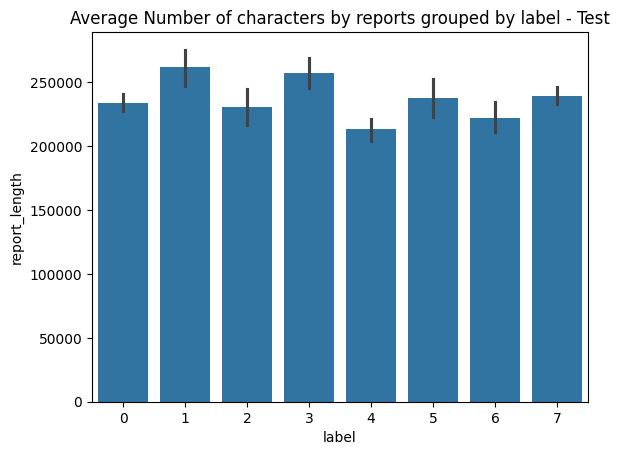

In [48]:
plotBar(df_plot_test, "label", "report_length")
plt.title('Average Number of characters by reports grouped by label - Test')
plt.show()


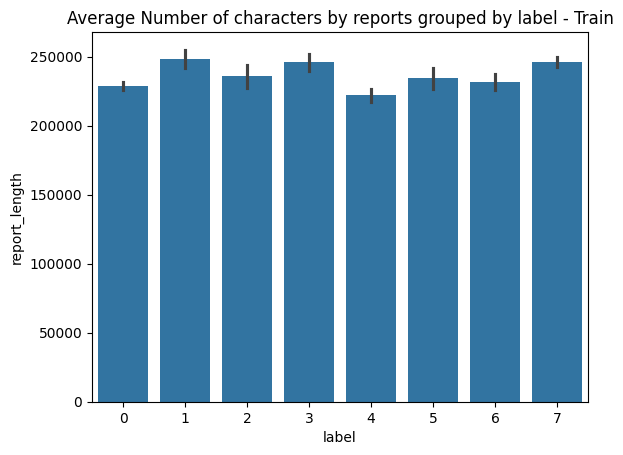

In [49]:
plotBar(df_plot_train, "label", "report_length")
plt.title('Average Number of characters by reports grouped by label - Train')
plt.show()


In [50]:
df_plot_test = df_test.select(["label", "report_word_count"]).orderBy(F.col("label").desc())
df_plot_train = df_train.select(["label", "report_word_count"]).orderBy(F.col("label").desc())

df_plot_test.show()
df_plot_train.show()

+-----+-----------------+
|label|report_word_count|
+-----+-----------------+
|    7|            58047|
|    7|            71105|
|    7|            62899|
|    7|            14204|
|    7|            28804|
|    7|            44380|
|    7|            24047|
|    7|            15286|
|    7|            39358|
|    7|            65123|
|    7|            42039|
|    7|            38444|
|    7|            26629|
|    7|            25210|
|    7|            23177|
|    7|            24677|
|    7|            34590|
|    7|            48454|
|    7|             4252|
|    7|            32635|
+-----+-----------------+
only showing top 20 rows



+-----+-----------------+
|label|report_word_count|
+-----+-----------------+
|    7|            10060|
|    7|            16291|
|    7|            47254|
|    7|            81404|
|    7|            34762|
|    7|            31033|
|    7|            43803|
|    7|            32158|
|    7|            25019|
|    7|            32955|
|    7|              564|
|    7|            14844|
|    7|            47841|
|    7|            76661|
|    7|            89497|
|    7|            44618|
|    7|            48515|
|    7|            18433|
|    7|            40511|
|    7|            29761|
+-----+-----------------+
only showing top 20 rows



## Using BarPlot graphic to show number of words in each report grouped by Labels


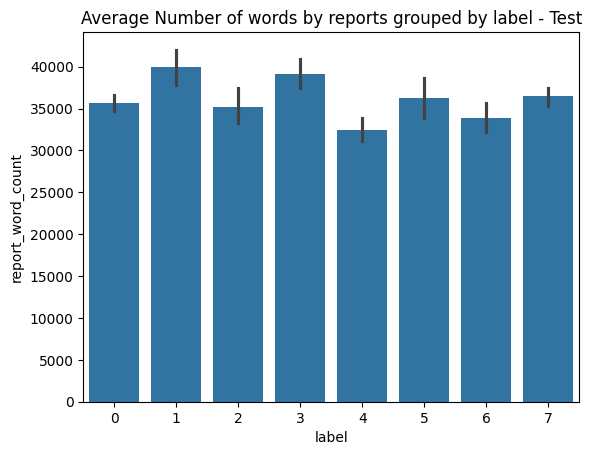

In [51]:
plotBar(df_plot_test, "label", "report_word_count")
plt.title('Average Number of words by reports grouped by label - Test')
plt.show()

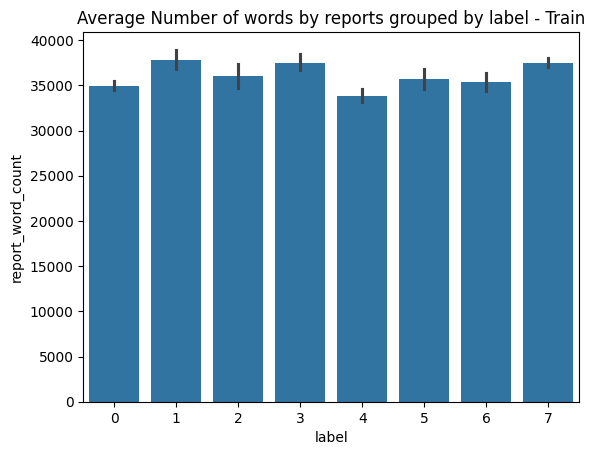

In [52]:
plotBar(df_plot_train, "label", "report_word_count")
plt.title('Average Number of words by reports grouped by label - Train')
plt.show()